# S Forecast Clasical Forecast Model Examples

## Contents

This notebook demonstrates how to employ sforecast train/test fit (sliding/expanding window out-of-sample train/test) to make forecast fits and predictions with classic forecast models - ARIMA, SARIMAX, and ATUOARIMA. The notebook demonstrates the mechanics of setting up and running the corresponding data and models. Mathematical, statistical, and interpretation discussions are out of scope of this notebook. 

Classical Forecasting Models 
   * ARIMA
   * SARIMAX
   * Auto ARIMA  


## Initialize Notebook

In [1]:
import sforecast as sf
print(f'sforecast version = {sf.__version__}')
import pandas as pd
import numpy as np
import beautifulplots as bp
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from pandas.plotting import autocorrelation_plot
datapath = "../data"

sforecast version = 0.1.0


## ARIMA

load data

df_shampoo.shape = (36, 2)


,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


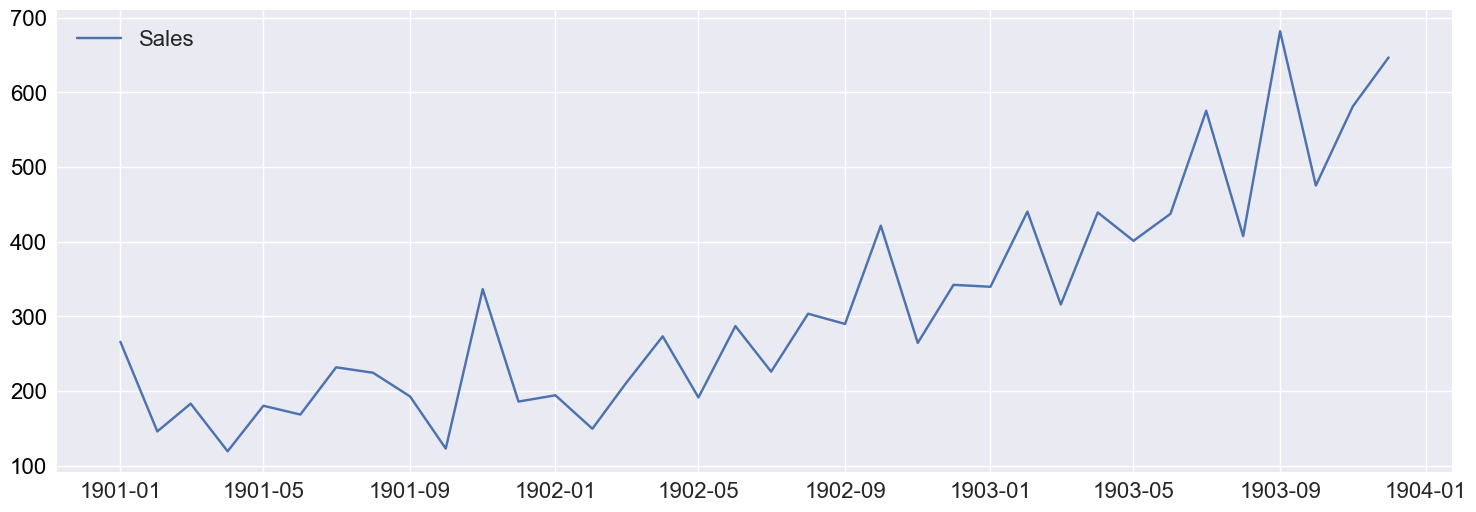

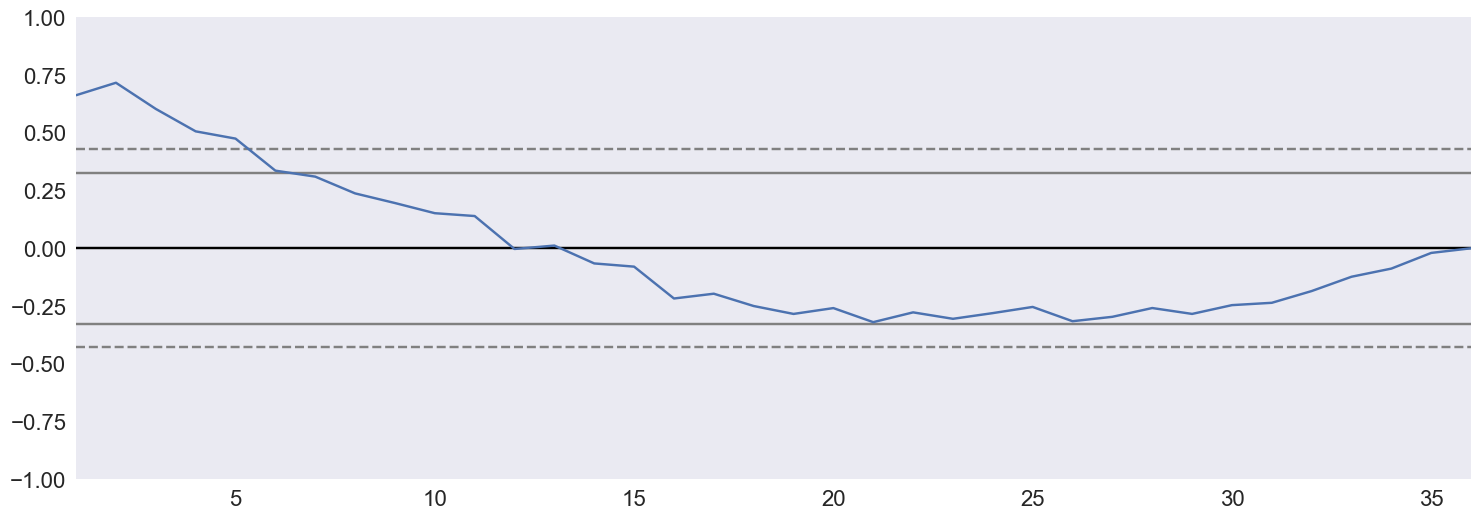

In [3]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ ... date parser and dataset
def dateparser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df_shampoo = pd.read_csv(f'{datapath}/shampoo.csv', parse_dates = ["Month"], date_parser=dateparser)
print("df_shampoo.shape =",df_shampoo.shape)
display(df_shampoo.head())
bp.lineplot(df_shampoo, x = "Month", y="Sales", figsize=(18,6), y_axis_format=".0f")

# Plot Sales Autocorrelation
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(18,6)) 
g=autocorrelation_plot(df_shampoo["Sales"])

plot_options = bp.plot_defaults()
bp.set_axisparams(plot_options,ax,g)
plt.show()


Fit - ARIMA sliding 5 period forecast

dfXY


,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3



metrics = {'Sales_pred': {'RMSE': 96.4139361648774, 'MAE': 78.28000065334483}}


,Month,Sales,Sales_train,Sales_test,Sales_pred,Sales_pred_error,Sales_pred_lower,Sales_pred_upper
31,1903-08-01,407.6,NaN,407.6,467.811682,60.211682,321.109698,517.812587
32,1903-09-01,682.0,NaN,682.0,519.261277,-162.738723,372.559293,569.262182
33,1903-10-01,475.3,NaN,475.3,464.182016,-11.117984,317.480032,514.182921
34,1903-11-01,581.3,NaN,581.3,615.984739,34.684739,469.282755,665.985644
35,1903-12-01,646.9,NaN,646.9,524.253124,-122.646876,377.551140,574.254029


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -200.188
Date:                Fri, 13 Jan 2023   AIC                            406.376
Time:                        12:29:06   BIC                            411.042
Sample:                             0   HQIC                           407.987
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9139      0.225     -4.067      0.000      -1.354      -0.473
ar.L2         -0.2630      0.189     -1.392      0.164      -0.633       0.107
sigma2      5311.7175   1383.504      3.839      0.0

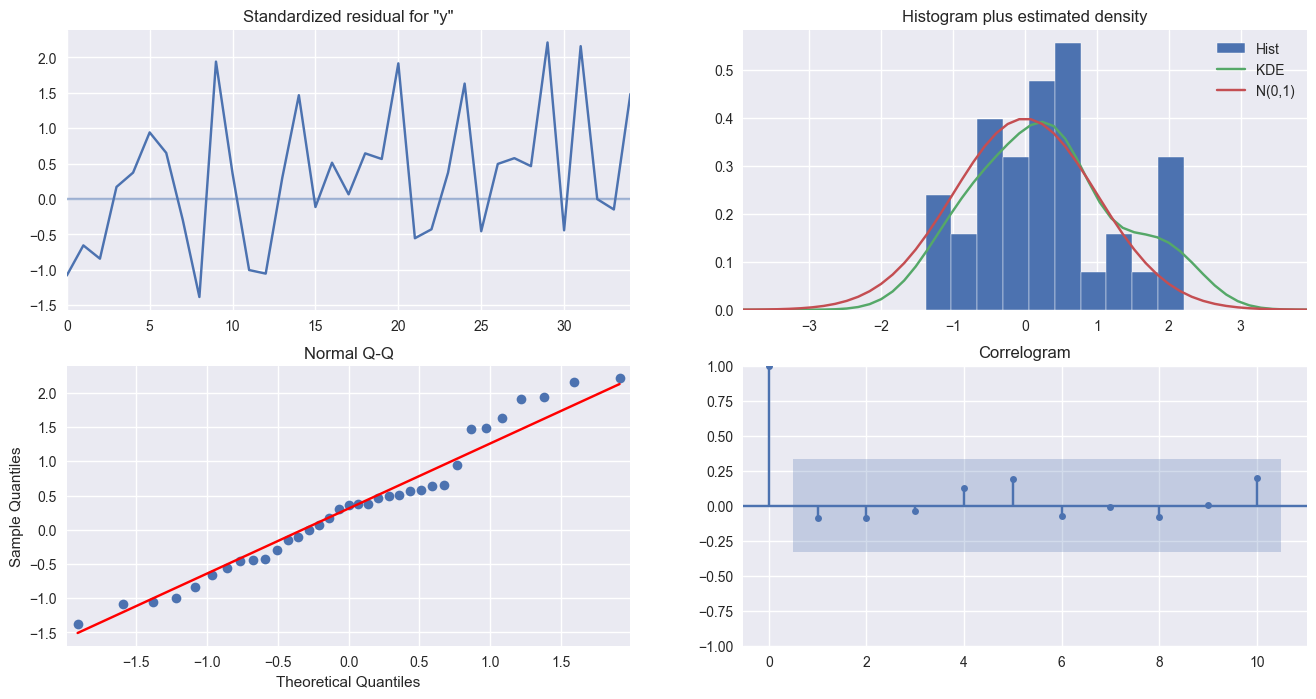

In [4]:
Ntest = 5
dfXY = df_shampoo
print('dfXY')
display(dfXY.head())

swin_params = {
    "Ntest":Ntest,
    "Nlags": 5,
    "minmax" :(0,None)}  

cm_parameters = {
    "model":"arima",
    "order":(2,1,0)
}

y = "Sales"
sf_arima = sf.sforecast(y = y, model=None,model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_params,)

df_pred_arima = sf_arima.fit(dfXY)

print(f'\nmetrics = {sf_arima.metrics}')
dfXY_pred_arima = dfXY.join(df_pred_arima)
display(dfXY_pred_arima.tail(Ntest))

print(sf_arima.model_fit.summary())

sf_arima.model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

plot observations and predictions with beautifulplots.lineplot

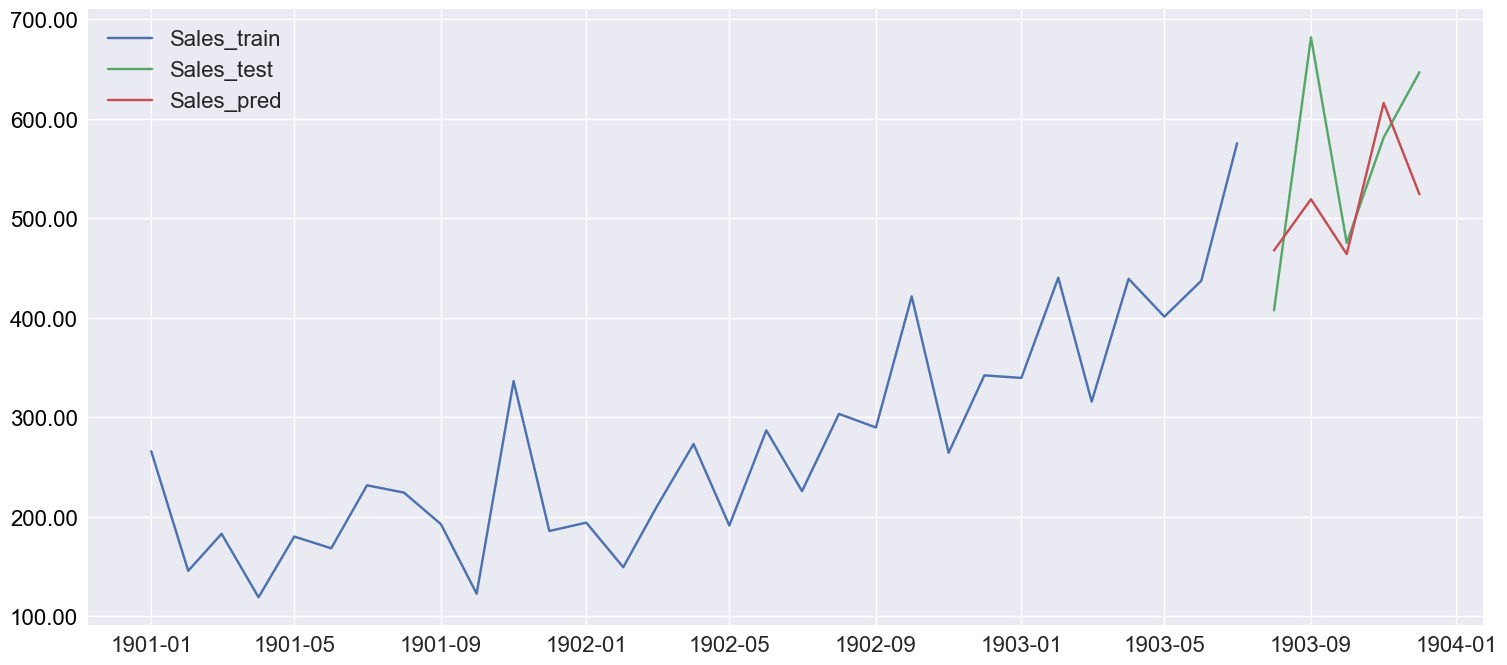

In [5]:
y =  "Sales" 
ytrain = y+"_train"
ytest = y+"_test"
ypred = y+"_pred"
error = y+"_pred_error"

bp.lineplot(dfXY_pred_arima, x= "Month", y=[ytrain, ytest , ypred] , figsize=(18,8))

Predict - based on the previously fitted model

In [6]:

ts_period = pd.DateOffset(months=1)
df_pred=sf_arima.predict(Nperiods=1,ts_period=ts_period)
df_pred

,Sales_pred
36,559.074667


direct use of ARIMA for comparison (1 period forward forecast)

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dfXY['Sales'], order=(2,1,0)) 
model_fit = model.fit()
y_pred=model_fit.forecast().values[0]
print("\ny_pred =",y_pred)



y_pred = 559.074666720351


## SARIMAX

load data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


rows with NA


,Passengers
Month,


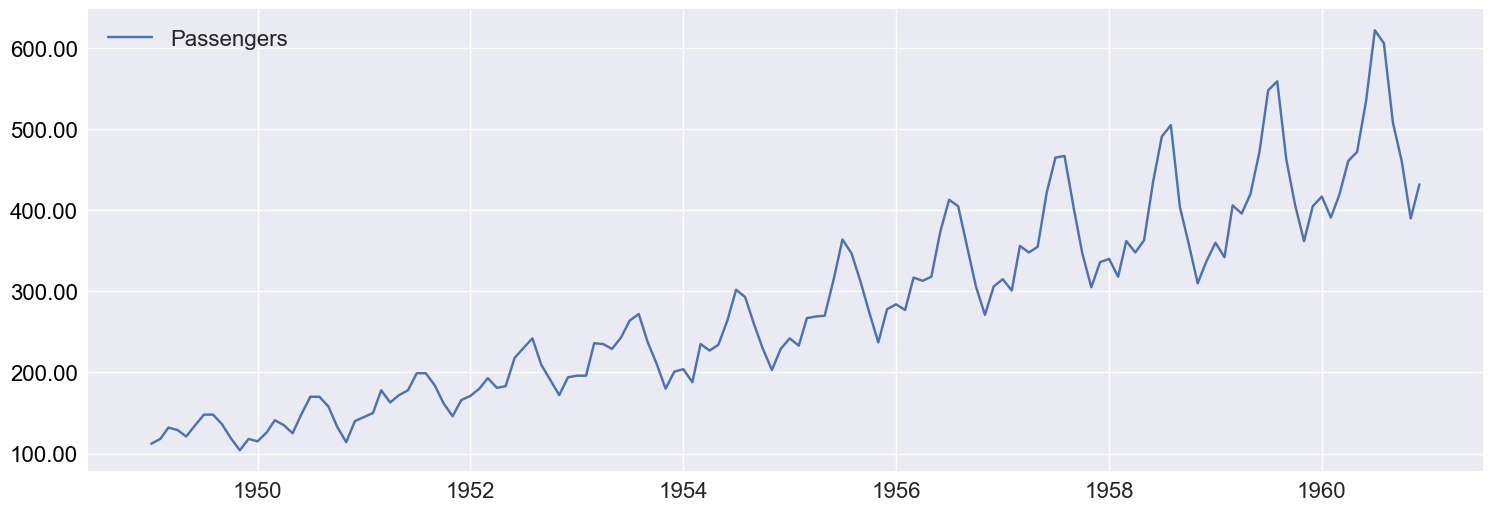

In [8]:
#data
#https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download

df_airp = pd.read_csv(f'{datapath}/AirPassengers.csv', parse_dates = ["Month"]).set_index("Month")
display(df_airp.head())

# rows with NA
print("rows with NA")
display(df_airp[df_airp.isna().any(axis=1)])

bp.lineplot(df_airp.reset_index(), x="Month", y=["Passengers"], figsize=(18,6))

**Sarimax w/o exogenous or endogenous/derived variables**

dfXY


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121



metrics = {'Passengers_pred': {'RMSE': 17.690164235121294, 'MAE': 16.266054804453347}}


,Passengers,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,
1960-08-01,606,606.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,508.0,NaN,NaN,NaN,NaN,NaN
1960-10-01,461,461.0,NaN,NaN,NaN,NaN,NaN
1960-11-01,390,NaN,390.0,413.220001,23.220001,423.922899,435.049213
1960-12-01,432,NaN,432.0,441.312108,9.312108,452.015006,463.141320


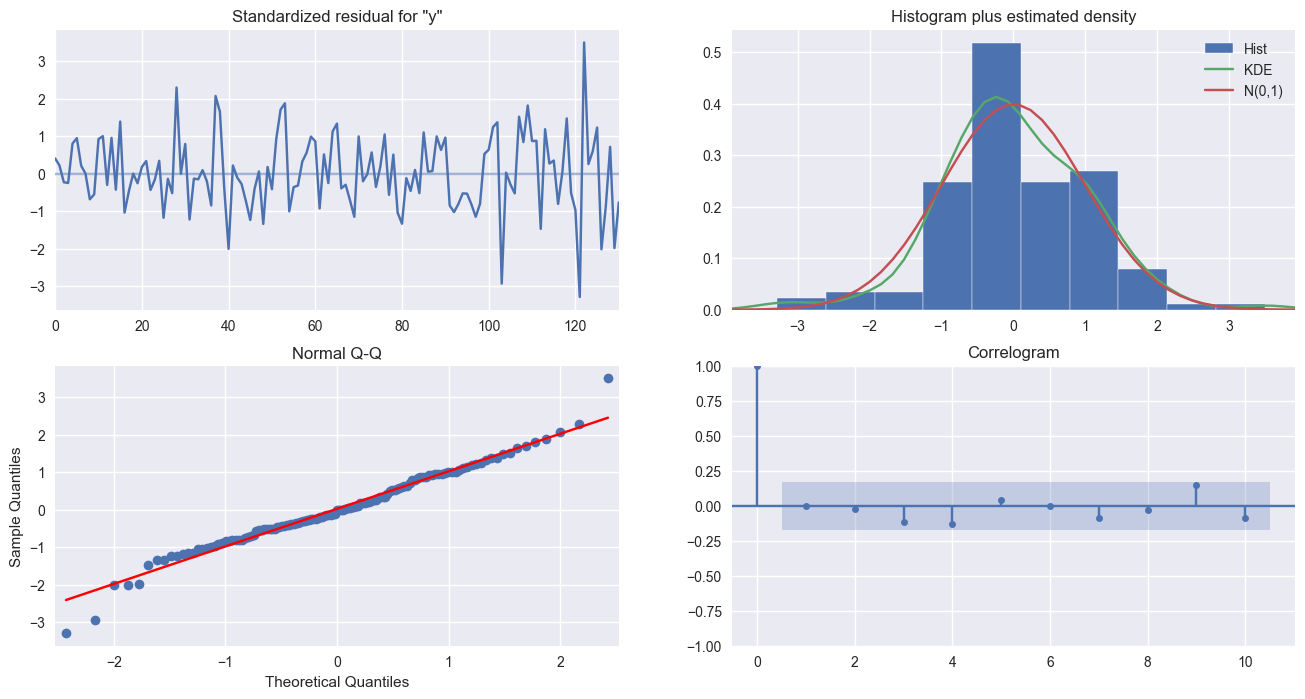

In [9]:

Ntest=2
dfXY = df_airp[["Passengers"]]
print('dfXY')
display(dfXY.head())

swin_parameters = {
    "Ntest":Ntest,
    "Nlags":5,
    "minmax" :(0,None),
    "Nhorizon":1,
    }

cm_parameters = {
    "model":"sarimax",
    "order":(2,1,0),
    "seasonal_order":(0,1,0,12)
    }

y = "Passengers"
sf_sarimax = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_parameters,)

df_pred_sarimax = sf_sarimax.fit(dfXY)

print(f'\nmetrics = {sf_sarimax.metrics}')
dfXY_pred_sarimax = dfXY.join(df_pred_sarimax)
display(dfXY_pred_sarimax.tail())

sf_sarimax.model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()


**Predict Sarimax no exogs**

In [10]:
ts_period = pd.DateOffset(months=1)
df_pred=sf_sarimax.predict(Nperiods=1,ts_period=ts_period)
df_pred

,Passengers_pred
1961-01-01,444.327801


**Exogenous Variables**

These variables are not dependent on the target (independent variable) and are ususally some form of external varialbe. For example, they could represent the weather, such as temperature or rain, or economic data, such as consumer confience index.

The exogenous variables are included in the input dataframe to the fit operation. An exogenous variables dataframe, one row per predict period is input to the predict operation.

Below is trivial example of exogenous variables, the month number is included as an exogenous variable input. df_airp has two variables the target variable and y = Passengers, and exogenous variable month_no

In [11]:
# add exogenous variable "month_no"
# df_airp has two variables the target variable y = Passengers, 
# and exogenous variable month_no

dfXY = df_airp.copy()

# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable

display(dfXY)

,Passengers,month_no
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


**Saramax w/ Exogs**

,Passengers,month_no
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5



metrics = {'Passengers_pred': {'RMSE': 15.309241439681522, 'MAE': 13.773480924095225}}


,Passengers,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,,
1960-08-01,606,8,606.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,9,508.0,NaN,NaN,NaN,NaN,NaN
1960-10-01,461,10,NaN,461.0,452.211667,-8.788333,447.043422,472.650089
1960-11-01,390,11,NaN,390.0,413.220001,23.220001,408.051756,433.658424
1960-12-01,432,12,NaN,432.0,441.312108,9.312108,436.143863,461.750531


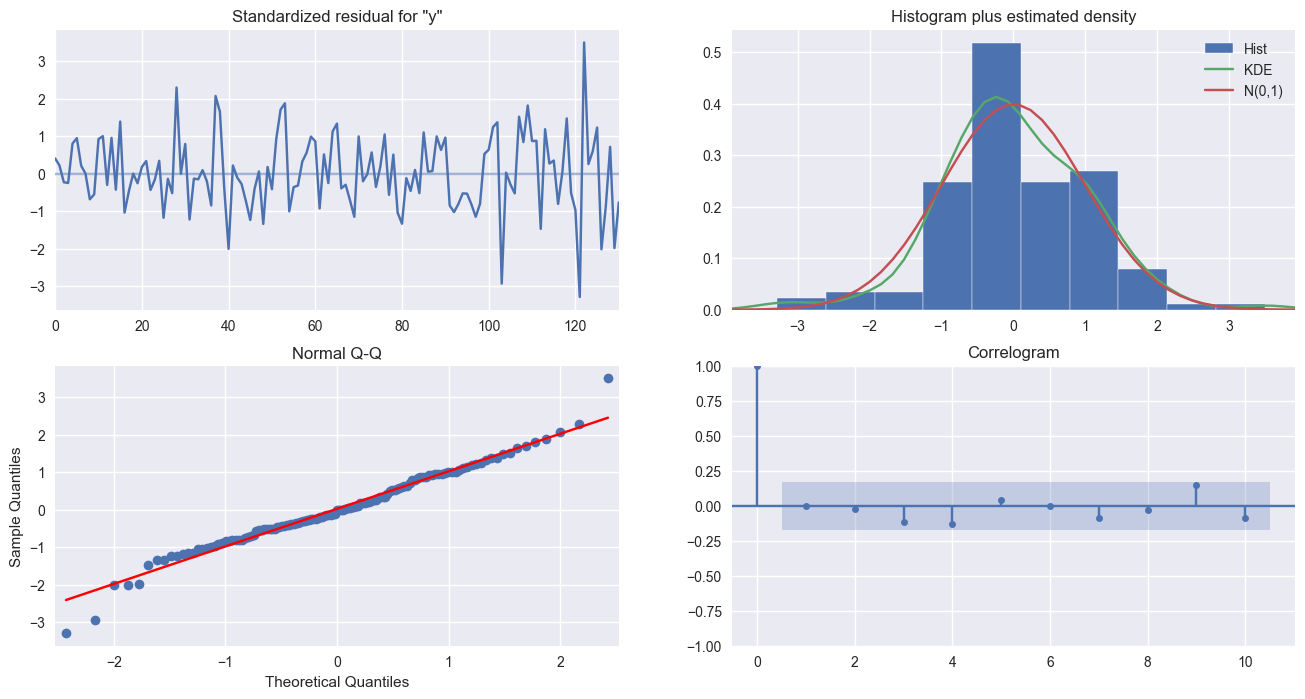

In [12]:
Ntest = 3
display(dfXY.head())

exogvars = ["month_no"]

swin_parameters = {
    "Ntest":Ntest,
    "Nlags":5,
    "minmax" :(0,None),
    "Nhorizon":1,
    "exogvars": exogvars
    }

cm_parameters = {
    "model":"sarimax",
    "order":(2,1,0),
    "seasonal_order":(0,1,0,12)
    }

y = "Passengers"
sf_sarimax = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_parameters,)

df_pred_sarimax = sf_sarimax.fit(dfXY)

print(f'\nmetrics = {sf_sarimax.metrics}')
dfXY_pred_sarimax = dfXY.join(df_pred_sarimax)
display(dfXY_pred_sarimax.tail())

sf_sarimax.model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

**predict sarimax w/ exogs**

In [13]:
ts_period = pd.DateOffset(months=1)
dfexogs = pd.DataFrame(data={"month_no":[1]})
df_pred=sf_sarimax.predict(Nperiods=1,dfexogs = dfexogs, ts_period=ts_period)
df_pred

,Passengers_pred
1961-01-01,444.327802


**Endogenous Variables**  
  
Endogenous variables are somehow dependent on the target (independent) variable(s). Often, these are variables derived from past targget variables. 

Sforecast employs SKlearn transform to derive variables based on past observations. A "Derived Variable Transform" is provided as input to the sforecast model. Based on this transform, endogenous (i.e., derived variables) are derived prior to each forecast.
  
In summary, the derived variable transform works as follws. Before each prediction, take the output from the previous prediction (i.e., recursive forecast) and update the transform memory. Then create a new set of derived variables. 

In this case, the below transform employs a rolling function (window = Nr past rows) to create mean and standard deviation variables. Since derived variables transform includes rolling window functions then enough past dataframe rows are saved for generation of the derived variables.

After each new prediction, a new row is appended to the dataframe and the most recent Nr rows are saved for generation of the next set of derived variables.

In [14]:
# derived attributes custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# pipeline/transformer development
# BaseEstimater ... get_params(), set_params() methods
# TransformerMixin ... fit_transform() method
Nr = 3
class derived_attributes(BaseEstimator,TransformerMixin):
    def __init__(self, Nr = Nr): 
        self.Nr = Nr # slidig/rolling window rows
        self.dfmemory = None
    
    def fit(self,df):
        # ensure dataframe has enough rows
        self.dfmemory = df.tail(self.Nr) if df.index.size > self.Nr else df.index.size
        return self
    
    def transform(self,df=None, Nout=None, dfnewrows=None):
        # if df not spefified then transform on dfmemory
        # add new row(s) ... these will be provided from the predict operation
        if not isinstance(df,pd.DataFrame):
            df = self.dfmemory
            if isinstance(dfnewrows,pd.DataFrame):
                df = pd.concat([df,dfnewrows])
        self.dfmemory = df.tail(self.Nr) 
        Nr=self.Nr
        dfnew=df.copy()
        
        dfnew["Passengers_m1_ravg"+str(Nr)] = dfnew["Passengers_m1"].rolling(window=Nr).mean()  
        dfnew["Passengers_m1_rstd"+str(Nr)] = dfnew["Passengers_m1"].rolling(window=Nr).std()
        # dfnew=dfnew.iloc[Nr:] # do not toss out first Nr rows since they will be NA  this will be managed by sforecast
    
        Nclip = self.Nr
        return dfnew if Nout == None else dfnew.tail(Nout)
    
    def get_Nclip(self): # returns the number of initial rows are desgarded (clipped) for NaN avoidence
        return self.Nr
    
    def get_derived_attribute_names(self):
        Nr = self.Nr
        return [ "Passengers_m1_ravg"+str(Nr), "Passengers_m1_rstd"+str(Nr) ]
        
        
# the variables eill be created by sforecast
# here we test the transform to see what the new variables look like.
Nclip =derived_attributes().get_Nclip()
print("Nclip =",Nclip)

drived_var_transform = derived_attributes()
df_airp_m1 = df_airp.copy()
df_airp_m1["Passengers_m1"] = df_airp["Passengers"].shift(1)
dftest = drived_var_transform.fit_transform(df_airp_m1)
print("dataframe, df_arip, with derived variables")
display(dftest)

print(f'Nr= {Nr} dfmemory 3 rows from dataframe, saved by the transform after first use')
display(drived_var_transform.dfmemory)

Nclip = 3
dataframe, df_arip, with derived variables


,Passengers,Passengers_m1,Passengers_m1_ravg3,Passengers_m1_rstd3
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN
1949-03-01,132,118.0,NaN,NaN
1949-04-01,129,132.0,120.666667,10.263203
1949-05-01,121,129.0,126.333333,7.371115
...,...,...,...,...
1960-08-01,606,622.0,543.000000,75.319320
1960-09-01,508,606.0,587.666667,46.306947
1960-10-01,461,508.0,578.666667,61.719797


Nr= 3 dfmemory 3 rows from dataframe, saved by the transform after first use


,Passengers,Passengers_m1
Month,,
1960-10-01,461,508.0
1960-11-01,390,461.0
1960-12-01,432,390.0



df_airp with exogenous variables is input to sforecast

The derived_attributes transform is passed into sforecast with the swin_parameters

The input dataframe does not include endogenous (derived variables). The engogenous will be created during the forecast (fit and predict) operations

dfXY


,Passengers,month_no
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5



metrics = {'Passengers_pred': {'RMSE': 17.16374548090822, 'MAE': 15.650663070929204}}


,Passengers,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,,
1960-08-01,606,8,NaN,606.0,629.985383,23.985383,629.462130,654.007160
1960-09-01,508,9,NaN,508.0,517.862159,9.862159,517.338905,541.883936
1960-10-01,461,10,NaN,461.0,453.553138,-7.446862,453.029884,477.574914
1960-11-01,390,11,NaN,390.0,414.046039,24.046039,413.522785,438.067815
1960-12-01,432,12,NaN,432.0,444.912872,12.912872,444.389618,468.934648


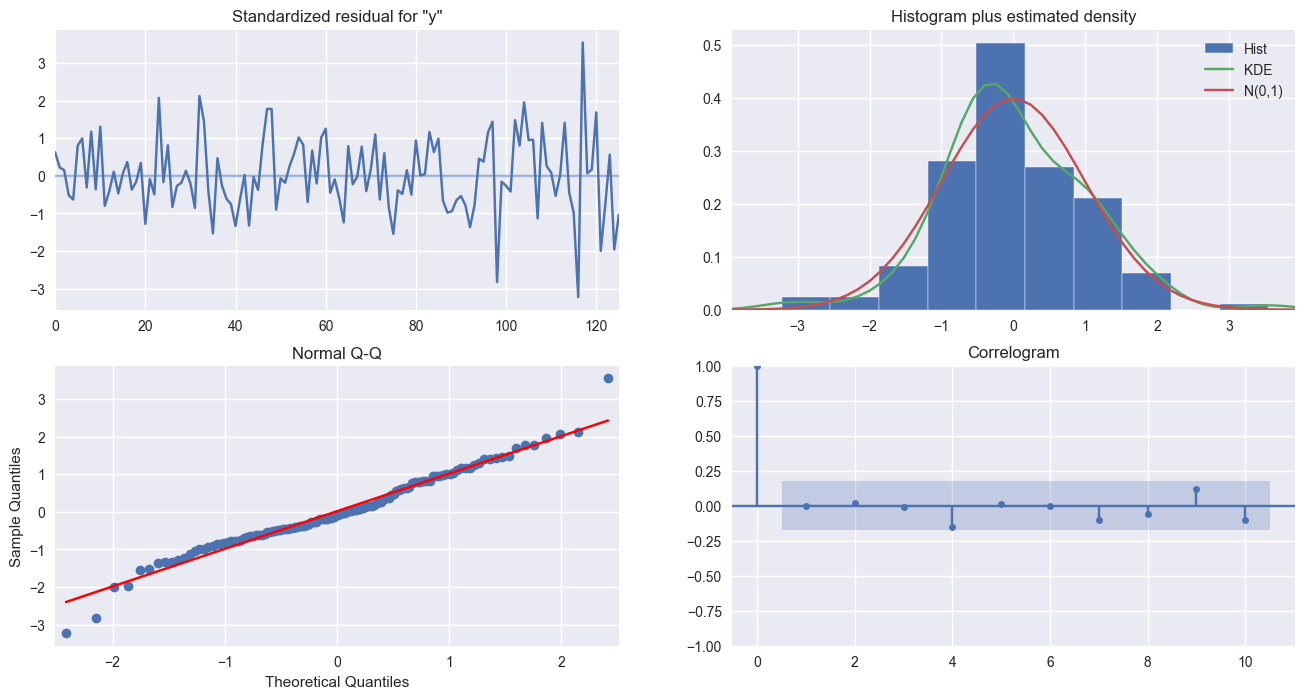

In [15]:
Ntest = 5

dfXY = df_airp.copy()

# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable
print('dfXY')
display(dfXY.head())

exenvars = ["month_no", "Passengers_m1_ravg3","Passengers_m1_rstd3"]
exogvars = ["month_no"]

swin_parameters = {
    "Ntest":Ntest,
    "Nlags":5,
    "minmax" :(0,None),
    "Nhorizon":1,
    "exogvars": exogvars,
    "derived_attributes_transform":derived_attributes
    }

cm_parameters = {
    "model":"sarimax",
    "order":(2,1,0),
    "seasonal_order":(0,1,0,12)
    }

y = "Passengers"
sf_sarimax = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_parameters,)

df_pred_sarimax = sf_sarimax.fit(dfXY)

print(f'\nmetrics = {sf_sarimax.metrics}')
dfXY_pred_sarimax = dfXY.join(df_pred_sarimax)
display(dfXY_pred_sarimax.tail())

sf_sarimax.model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

**Predict sarimax w exogenous and endogenous/derived variables**  
must specify dfexogenous  
also since index is a timestamp, must specify the time series period, s_period

In [16]:

dfexogs = pd.DataFrame(data = {"month_no":[1]})
ts_period = pd.DateOffset(months=1)
df_pred=sf_sarimax.predict(Nperiods=1,dfexogs=dfexogs, ts_period=ts_period)
df_pred

,Passengers_pred
1961-01-01,446.107189


**Multiple Univariate Forecats**

Add another passenger. This assumes that the basic statistical properties, ARIMA order and Seasonal orders, are shared by the two variables. The forecast does make use of multivariate information, they are three separate independant univariate forecasts. If the statistics differ between multiple variables then it is better to run multiple sforecast predictions with appropriate input parameters that account for the respective statistical properties. 

dfXY.tail()


,Passengers,Passengers2,month_no
Month,,,
1960-08-01,606,761.50,8
1960-09-01,508,659.50,9
1960-10-01,461,588.00,10
1960-11-01,390,505.25,11
1960-12-01,432,529.50,12



metrics = {'Passengers_pred': {'RMSE': 16.74309801335174, 'MAE': 15.244803777810876}, 'Passengers2_pred': {'RMSE': 16.525756205160498, 'MAE': 14.950278558420905}}


,Passengers,Passengers2,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper,Passengers2_train,Passengers2_test,Passengers2_pred,Passengers2_pred_error,Passengers2_pred_lower,Passengers2_pred_upper
Month,,,,,,,,,,,,,,,
1960-08-01,606,761.50,8,NaN,606.0,630.137901,24.137901,628.589745,653.908643,NaN,761.50,785.191671,23.691671,784.087854,808.742403
1960-09-01,508,659.50,9,NaN,508.0,518.765675,10.765675,517.217518,542.536416,NaN,659.50,670.054853,10.554853,668.951035,693.605585
1960-10-01,461,588.00,10,NaN,461.0,452.211667,-8.788333,450.663510,475.982408,NaN,588.00,580.029964,-7.970036,578.926147,603.580697
1960-11-01,390,505.25,11,NaN,390.0,413.220001,23.220001,411.671845,436.990743,NaN,505.25,528.589324,23.339324,527.485506,552.140056
1960-12-01,432,529.50,12,NaN,432.0,441.312108,9.312108,439.763952,465.082850,NaN,529.50,538.695510,9.195510,537.591693,562.246242


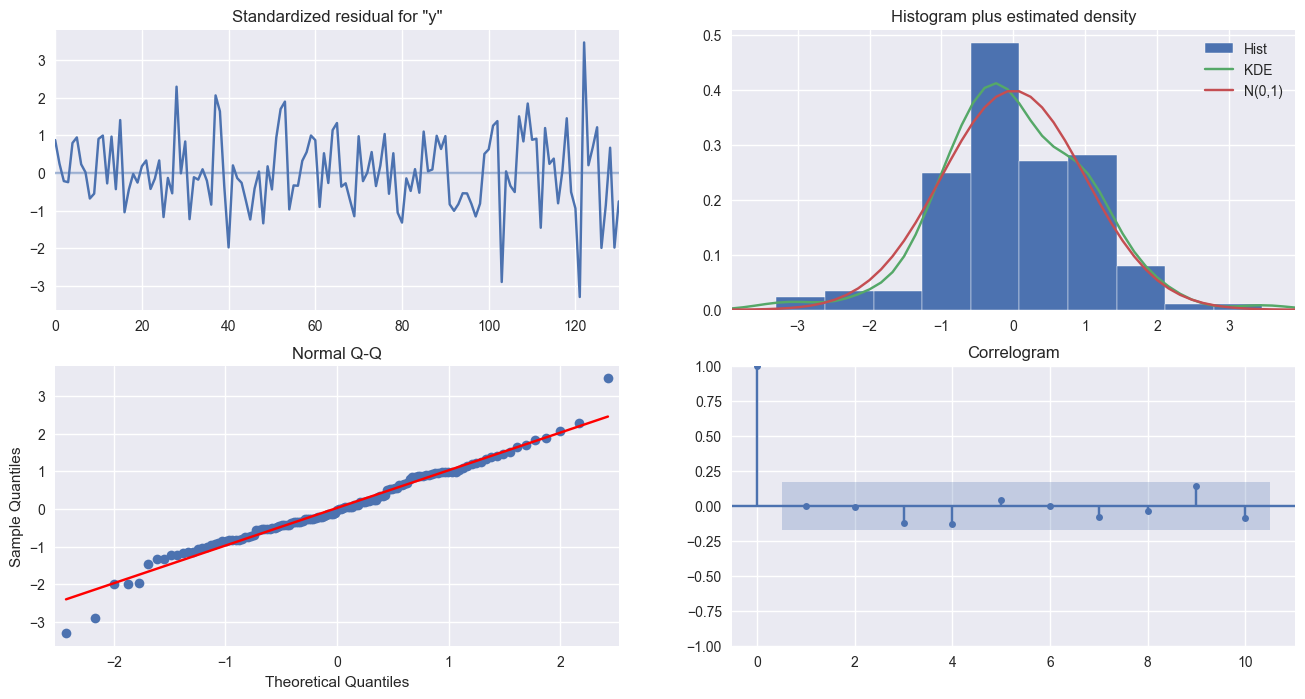

In [17]:
dfXY = df_airp.copy()
# Passengers 2 exponential smooth and scaled
a = 0.2
dfXY["Passengers2"]= 1.25*((1-a)*dfXY["Passengers"] + a* (dfXY["Passengers"].shift(1)) )
dfXY["Passengers2"] = dfXY["Passengers2"].bfill()

Ntest = 5

# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable
print('dfXY.tail()')

display(dfXY.tail())

exogvars = ["month_no"]

swin_parameters = {
    "Ntest":Ntest,
    "Nlags":5,
    "minmax" :(0,None),
    "Nhorizon":1,
    "exogvars": exogvars,
    }

cm_parameters = {
    "model":"sarimax",
    "order":(2,1,0),
    "seasonal_order":(0,1,0,12)
    }

y = ["Passengers", "Passengers2"]
sf_sarimax = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_parameters,)

df_pred_sarimax = sf_sarimax.fit(dfXY)

print(f'\nmetrics = {sf_sarimax.metrics}')
dfXY_pred_sarimax = dfXY.join(df_pred_sarimax)
display(dfXY_pred_sarimax.tail())

sf_sarimax.model_fit["Passengers2"].plot_diagnostics(figsize=(16, 8))
plt.show()

**Predict multiple outputs (1-step)**

In [18]:
dfexogs = pd.DataFrame(data = {"month_no":[1]})
ts_period = pd.DateOffset(months=1)
df_pred=sf_sarimax.predict(Nperiods=1,dfexogs=dfexogs, ts_period=ts_period)
df_pred

,Passengers_pred,Passengers2_pred
1961-01-01,444.327802,552.827532


direct use of SARIMAX for comparision. 1 period forward forecast

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = "Passengers"

exens = ["month_no","Passengers_m1_ravg3","Passengers_m1_rstd3"]
make_derived_attributes = derived_attributes()
dfXY2 = dfXY.copy()
dfXY2["Passengers_m1"]= dfXY2["Passengers"].shift(1) # derived variables needs the lagged output y(-1) = Passengers_m1
dfXY2=make_derived_attributes.fit_transform(dfXY2)
dfXY2=dfXY2.iloc[5:]
display(dfXY2.head())

sarima_model=SARIMAX(dfXY2.iloc[:-1][y].values, exog = dfXY2.iloc[:-1][exens].values, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12),
                    enforce_stationarity=False, enforce_invertibility=False)

sarima_model_fit = sarima_model.fit(disp=False)
y_pred = sarima_model_fit.forecast(exog=dfXY2[exens].tail(1).values)[0]   # note, derived variables (i.e., exogs / endogenous ) not updated
print("y_pred =",y_pred)
#print("y_actual =",dfXY2.tail(1)[y].values[0])

,Passengers,Passengers2,month_no,Passengers_m1,Passengers_m1_ravg3,Passengers_m1_rstd3
Month,,,,,,
1949-06-01,135,165.25,6,121.0,127.333333,5.686241
1949-07-01,148,181.75,7,135.0,128.333333,7.023769
1949-08-01,148,185.00,8,148.0,134.666667,13.503086
1949-09-01,136,173.00,9,148.0,143.666667,7.505553
1949-10-01,119,153.00,10,136.0,144.000000,6.928203


y_pred = 445.0213136581503


## Auto ARIMA

univariate

In [21]:
Ntest = 4
Nhorizon = 2
dfXY = df_airp
print("dfXY.index.size = ", dfXY.index.size)
print('dfXY.tail()')
display(dfXY.tail())


swin_params = {
    "Ntest":Ntest,
    "Nlags":5,
    "Nhorizon": Nhorizon,
    "minmax" :(0,None)
    }  

cm_parameters = {
    "model":"auto_arima",
    "d":None, # let the auto search determine d
    "start_p":1,
    "start_q":1,
    "seasonal":True ,
    "D":None, # let auto search determine D
    "m":12, # 12, period (i.e., month) seasonality period
    "start_P":1,
    "start_Q":1,
    "error_action":"ignore", # don't want to know if order does not work
    "suppress_warnings":True, # don't want convergence warnings
    "stepwise":True # stepwise search
}

y = "Passengers"
sf_autoarima = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_params,)

df_pred_autoarima = sf_autoarima.fit(dfXY)

print(f'\nmetrics = {sf_autoarima.metrics}')

print("confidence intervals = ",sf_autoarima.ci )
dfXY_pred_autoarima = dfXY.join(df_pred_autoarima)
display(dfXY_pred_autoarima.tail())


dfXY.index.size =  144
dfXY.tail()


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=999.041, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=988.030, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=988.606, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=987.497, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=988.367, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=989.465, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=989.427, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=987.923, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=985.987, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=986.643, Time=0.35 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=986.912, Time=0.33 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=98

,Passengers,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,
1960-08-01,606,606.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,NaN,508.0,514.690165,6.690165,523.115937,537.000791
1960-10-01,461,NaN,461.0,455.350909,-5.649091,452.771351,477.327609
1960-11-01,390,NaN,390.0,414.046232,24.046232,422.472004,436.356857
1960-12-01,432,NaN,432.0,457.046232,25.046232,454.466674,479.022932


**predict autoarima**

In [22]:

ts_period = pd.DateOffset(months=1)
df_pred=sf_autoarima.predict(Nperiods=3, ts_period=ts_period)
df_pred

,Passengers_pred
1961-01-01,451.347076
1961-02-01,427.102222
1961-03-01,463.382490


**autoarima fit with exogenous variables, Nhorizon = 3**

In [23]:
Ntest = 3
Nhorizon = 3
dfXY = df_airp.copy()

# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable

print('dfXY')
display(dfXY.head())

exogvars = ["month_no"]

swin_params = {
    "Ntest":Ntest,
    "Nlags":5,
    "Nhorizon":Nhorizon,
    "minmax" :(0,None),
    "exogvars": exogvars,
    }  

cm_parameters = {
    "model":"auto_arima",
    "d":None, # let the auto search determine d
    "start_p":1,
    "start_q":1,
    "seasonal":True ,
    "D":None, # let auto search determine D
    "m":12, # 12, period (i.e., month) seasonality period
    "start_P":1,
    "start_Q":1,
    "error_action":"ignore", # don't want to know if order does not work
    "suppress_warnings":True, # don't want convergence warnings
    "stepwise":True # stepwise search
}

y = "Passengers"
sf_autoarima = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_params,)

df_pred_autoarima = sf_autoarima.fit(dfXY)

print(f'\nmetrics = {sf_autoarima.metrics}')

dfXY_pred_autoarima = dfXY.join(df_pred_autoarima)
display(dfXY_pred_autoarima.tail())

dfXY


,Passengers,month_no
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.914, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=995.467, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=995.933, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=995.060, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=995.871, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=997.033, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=996.991, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=995.306, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=993.005, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=993.546, Time=0.32 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=993.857, Time=0.31 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=9

,Passengers,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,,
1960-08-01,606,8,606.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,9,508.0,NaN,NaN,NaN,NaN,NaN
1960-10-01,461,10,NaN,461.0,451.130222,-9.869778,441.260444,441.260444
1960-11-01,390,11,NaN,390.0,405.185239,15.185239,420.370478,420.370478
1960-12-01,432,12,NaN,432.0,447.437675,15.437675,462.875350,462.875350


**autoarima predict with exogvars**

In [24]:

dfexogs = pd.DataFrame(data = {"month_no":[1,2,3,4,5]})
print("dfexogs")
display(dfexogs)
ts_period = pd.DateOffset(months=1)
df_pred=sf_autoarima.predict(Nperiods=5,dfexogs=dfexogs, ts_period=ts_period)
df_pred

dfexogs


,month_no
0,1
1,2
2,3
3,4
4,5


,Passengers_pred
1961-01-01,451.347076
1961-02-01,427.102222
1961-03-01,463.382490
1961-04-01,499.705770
1961-05-01,514.035525


**autoarima fit with exogenous and endogenous (derived) variables**

In [25]:
Ntest = 2
Nhorizon = 1
dfXY = df_airp.copy()
# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable

print('dfXY')
display(dfXY.head())

exenvars = ["month_no", "Passengers_m1_ravg3","Passengers_m1_rstd3"]
exogvars = ["month_no"]

swin_params = {
    "Ntest":Ntest,
    "Nlags":5,
    "Nhorizon":Nhorizon,
    "minmax" :(0,None),
    "exogvars": exogvars,
    "derived_attributes_transform":derived_attributes
    }  

cm_parameters = {
    "model":"auto_arima",
    "d":None, # let the auto search determine d
    "start_p":1,
    "start_q":1,
    "seasonal":True ,
    "D":None, # let auto search determine D
    "m":12, # 12, period (i.e., month) seasonality period
    "start_P":1,
    "start_Q":1,
    "error_action":"ignore", # don't want to know if order does not work
    "suppress_warnings":True, # don't want convergence warnings
    "stepwise":True # stepwise search
}

y = "Passengers"
sf_autoarima = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_params,)

df_pred_autoarima = sf_autoarima.fit(dfXY)

print(f'\nmetrics = {sf_autoarima.metrics}')

print("confidence intervals = ",sf_autoarima.ci )
dfXY_pred_autoarima = dfXY.join(df_pred_autoarima)
display(dfXY_pred_autoarima.tail())

dfXY


,Passengers,month_no
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=978.102, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=967.747, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=967.946, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=967.102, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=968.074, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=969.102, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=969.102, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=967.131, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=964.570, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=965.398, Time=0.32 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=965.622, Time=0.39 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=96

,Passengers,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper
Month,,,,,,,,
1960-08-01,606,8,606.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,9,508.0,NaN,NaN,NaN,NaN,NaN
1960-10-01,461,10,461.0,NaN,NaN,NaN,NaN,NaN
1960-11-01,390,11,NaN,390.0,410.903505,20.903505,420.313308,430.529931
1960-12-01,432,12,NaN,432.0,440.132725,8.132725,449.542529,459.759152


**autoarima predict w exogenous and endogenous variables**

In [26]:
dfexogs = pd.DataFrame(data = {"month_no":[1]})

ts_period = pd.DateOffset(months=1)
df_pred=sf_autoarima.predict(Nperiods=1,dfexogs=dfexogs, ts_period=ts_period)
df_pred

,Passengers_pred
1961-01-01,444.313732


**multiple pdarima univariate forecast w/ exogenous and endogenous variabless**

In [27]:
Ntest = 2
Nhorizon = 1
dfXY = df_airp.copy()

# Passengers 2 exponential smooth and scale
a = 0.2
dfXY["Passengers2"]= 1.25*((1-a)*dfXY["Passengers"] + a* (dfXY["Passengers"].shift(1)) )
dfXY["Passengers2"] = dfXY["Passengers2"].bfill()

# Exogenous variables
dfXY["month_no"] = dfXY.index.month # exog variable

print('dfXY')
display(dfXY.tail())


exogvars = ["month_no"]

swin_params = {
    "Ntest":Ntest,
    "Nlags":5,
    "Nhorizon":Nhorizon,
    "minmax" :(0,None),
    "exogvars": exogvars,
    "derived_attributes_transform":derived_attributes
    }  

cm_parameters = {
    "model":"auto_arima",
    "d":None, # let the auto search determine d
    "start_p":1,
    "start_q":1,
    "seasonal":True ,
    "D":None, # let auto search determine D
    "m":12, # 12, period (i.e., month) seasonality period
    "start_P":1,
    "start_Q":1,
    "error_action":"ignore", # don't want to know if order does not work
    "suppress_warnings":True, # don't want convergence warnings
    "stepwise":True # stepwise search
}

y = ["Passengers", "Passengers2"]
sf_autoarima = sf.sforecast(y = y, model=None, model_type="cm", cm_parameters=cm_parameters,
                    swin_parameters=swin_params,)

df_pred_autoarima = sf_autoarima.fit(dfXY)

print(f'\nmetrics = {sf_autoarima.metrics}')

dfXY_pred_autoarima = dfXY.join(df_pred_autoarima)
display(dfXY_pred_autoarima.tail())

dfXY


,Passengers,Passengers2,month_no
Month,,,
1960-08-01,606,761.50,8
1960-09-01,508,659.50,9
1960-10-01,461,588.00,10
1960-11-01,390,505.25,11
1960-12-01,432,529.50,12


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=978.102, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=967.747, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=967.946, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=967.102, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=968.074, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=969.102, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=969.102, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=967.131, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=964.570, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=965.398, Time=0.37 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=965.622, Time=0.42 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=96

,Passengers,Passengers2,month_no,Passengers_train,Passengers_test,Passengers_pred,Passengers_pred_error,Passengers_pred_lower,Passengers_pred_upper,Passengers2_train,Passengers2_test,Passengers2_pred,Passengers2_pred_error,Passengers2_pred_lower,Passengers2_pred_upper
Month,,,,,,,,,,,,,,,
1960-08-01,606,761.50,8,606.0,NaN,NaN,NaN,NaN,NaN,761.5,NaN,NaN,NaN,NaN,NaN
1960-09-01,508,659.50,9,508.0,NaN,NaN,NaN,NaN,NaN,659.5,NaN,NaN,NaN,NaN,NaN
1960-10-01,461,588.00,10,461.0,NaN,NaN,NaN,NaN,NaN,588.0,NaN,NaN,NaN,NaN,NaN
1960-11-01,390,505.25,11,NaN,390.0,410.903505,20.903505,420.313308,430.529931,NaN,505.25,526.29444,21.04444,535.148884,545.984436
1960-12-01,432,529.50,12,NaN,432.0,440.132725,8.132725,449.542529,459.759152,NaN,529.50,537.00000,7.50000,545.854444,556.689996


**predict multiple univariate pdarima**

In [28]:
dfexogs = pd.DataFrame(data = {"month_no":[1]})
ts_period = pd.DateOffset(months=1)
df_pred=sf_autoarima.predict(Nperiods=1,dfexogs=dfexogs, ts_period=ts_period)
df_pred

,Passengers_pred,Passengers2_pred
1961-01-01,444.313732,553.432021


**autoarima: direct use of auto_arima for comparison**

In [29]:
# autoarima tutorial references
# https://alkaline-ml.com/pmdarima/1.3.0/tips_and_tricks.html
# https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

# note that dfXY index is month so autoarima figures out the indexes corresponding to the forecasted horizon

import pmdarima as pm

Ntest = 3

y=["Passengers"]
exog_vars = ["Passengers_m1_ravg3","Passengers_m1_rstd3","month_no"]


exens = ["month_no","Passengers_m1_ravg3","Passengers_m1_rstd3"]
make_derived_attributes = derived_attributes()
dfXY2 = dfXY.copy()
dfXY2["Passengers_m1"]= dfXY2["Passengers"].shift(1) # derived variables needs the lagged output y(-1) = Passengers_m1
dfXY2=make_derived_attributes.fit_transform(dfXY2)
dfXY2=dfXY2.iloc[5:]
display(dfXY2.head())

arima_model = pm.auto_arima(dfXY2.iloc[:-Ntest][y], exogenous = dfXY2.iloc[:-Ntest][exog_vars] , 
                         start_p=1, start_q=1, d=None,
                         test = "adf", # test ADF (augmented Dickey-Fuller) for stationarity
                         #max_p=5, max_q=5, 
                         max_q=None,
                         seasonal=True, #set to seasonal 
                         #start_P=0, start_Q=1,
                         start_Q=0,
                         max_Q=None,
                         m=12, # frequncy of the cycle 12 months
                         D=None, #order of the seasonal differencing ... will be estimated when seasonality = True
                         trace=True,   # print model AIC 
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True, # don't want convergence warnings
                         stepwise=True # stepwise search
                                                      )
arima_model.fit(dfXY2.iloc[:-Ntest][y], exogenous = dfXY2.iloc[:-Ntest][exog_vars])

n_periods = 3
ypred=arima_model.predict(n_periods,dfXY2.tail(Ntest)[exog_vars])


display(ypred)

,Passengers,Passengers2,month_no,Passengers_m1,Passengers_m1_ravg3,Passengers_m1_rstd3
Month,,,,,,
1949-06-01,135,165.25,6,121.0,127.333333,5.686241
1949-07-01,148,181.75,7,135.0,128.333333,7.023769
1949-08-01,148,185.00,8,148.0,134.666667,13.503086
1949-09-01,136,173.00,9,148.0,143.666667,7.505553
1949-10-01,119,153.00,10,136.0,144.000000,6.928203


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=962.600, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=970.701, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=960.603, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=960.993, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=959.828, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=960.899, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=961.801, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=961.762, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=960.112, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=957.064, Time=0.16 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=958.007, Time=0.55 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=958.212, Time=0.51 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AI

1960-10-01    450.689969
1960-11-01    404.489210
1960-12-01    446.502509
Freq: MS, dtype: float64